In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  

In [2]:
movie_data = pd.read_csv('movie_data.csv')

features = movie_data.drop(['rois', 'gross', 'name'], axis=1)
# features = features.drop('gross')
print(features.head())

print(features.columns)
 
# for col in features.columns:
#     std = features[col].std()
#     mean = features[col].mean()
#     print(str(std) +"  "+ str(mean))
#     features[col] = (features[col] - mean)/std


rois = list(movie_data['rois'])
gross = list(movie_data['gross'])

print(features.head())


   imdbRating  Rotten_Tomatoes  Metacritic  imdbVotes       budget       cast  \
0         7.8             83.0        83.0   985058.0  425000000.0  20.508573   
1         6.6             32.0        45.0   421506.0  410600000.0  19.881517   
2         7.4             75.0        66.0   570791.0  330600000.0  20.185596   
3         8.0             93.0        81.0   731094.0  306000000.0  20.376316   
4         7.1             45.0        50.0   526511.0  300000000.0  19.876001   

    keywords  production_method  franchise  creative_type      genre  \
0  19.913894          19.141719  21.651815      18.873247  18.979856   
1  19.189550          18.275310  20.599216      18.770274  19.260458   
2  19.695346          19.141719  20.907445      19.860839  18.979856   
3  19.591507          19.141719  20.543740      18.873247  19.260458   
4  19.768524          18.275310  20.599216      18.162167  19.260458   

   production_companies  
0             19.693085  
1             19.758072  
2 

In [7]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features, gross, test_size=0.5, stratify=gross, random_state=1234)
rf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

probability = rf.predict_proba(X_test)
featue_importance = list(zip(features.columns, rf.feature_importances_))

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.632
Mean accuracy score: 0.642


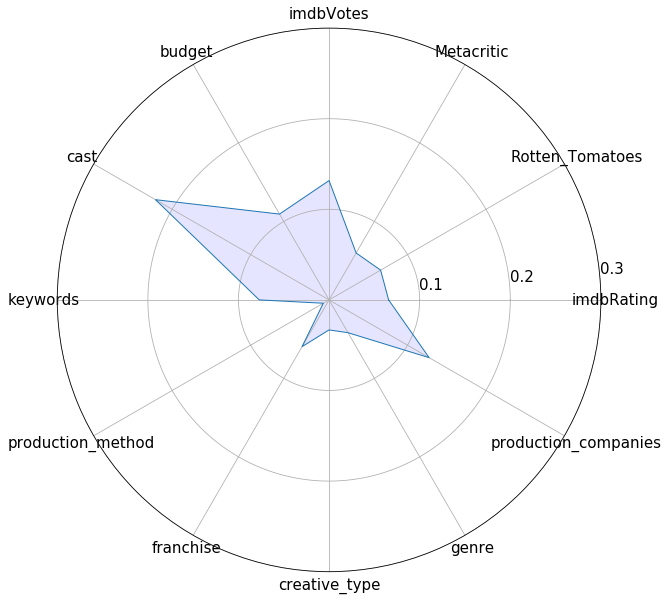

In [8]:
# Libraries
import matplotlib.pyplot as plt
from math import pi
 
# Set data
categories = []
imp_val = []
for imp in featue_importance:
    categories.append(imp[0])
    imp_val.append(imp[1])


# df = pd.DataFrame({
# 'group': ['A','B','C','D'],
# 'var1': [38, 1.5, 30, 4],
# 'var2': [29, 10, 9, 34],
# 'var3': [8, 39, 23, 24],
# 'var4': [7, 31, 33, 14],
# 'var5': [28, 15, 32, 14]
# })
 
# number of variable
# categories=list(df)[1:]
# N = len(categories)

N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
# values=df.loc[0].drop('group').values.flatten().tolist()
imp_val += imp_val[:1]
# print(values)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
from matplotlib import pyplot
pyplot.figure(figsize=(10, 10))
ax = plt.subplot(111,polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='black', size=15)
 
# Draw ylabels
ax.set_rlabel_position(5)
plt.yticks([0.1,0.2,0.3], ["0.1","0.2","0.3"], color="black", size=15)
plt.ylim(0,0.3)
 
# Plot data
ax.plot(angles, imp_val, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, imp_val, 'b', alpha=0.1)


In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20, ), random_state=1)
clf.fit(X_train, y_train)    
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.629
Mean accuracy score: 0.591


In [7]:
#****** SVM  ******#
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)   
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.551


In [8]:
# #****** neural network ******#

# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, Embedding, Flatten
# from keras.utils import plot_model
# from keras import backend

# model = Sequential()

# model.add(Embedding(len(), 250, input_length=max_length))
# model.add(Dense(256, activation=backend.relu))
# # model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Dense(128, activation=backend.relu))
# # model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation=backend.relu))
# # model.add(Activation('relu'))
# model.add(Dropout(0.3))
# # print out the network architecture
# model.summary()


# num_labels = 8

# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

In [9]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [10]:
# model.compile(loss='categorical_crossentropy', 
#               optimizer='adam',
#               metrics=['accuracy'])

In [11]:
# import numpy as np
# from keras.utils import to_categorical

# # conver our tags to a vector
# # In our example, if we have two labels: 0 and 1
# # Then the two labels will be transformed to [1 0] and [0 1]
# train_tags = to_categorical(train_tags)

# batch_size = 32
# train_tags = np.array(train_tags)

# valid_tags = to_categorical(valid_tags)
# valid_tags = np.array(valid_tags)

# # epochs: the number of times the algorithm being trained on the entire data set
# model.fit(padded_train_sms,
#           train_tags,
#           epochs=4,
#           verbose=1)

In [12]:
# from keras.models import load_model

# # save the model to disk
# model.save('spam_classification.h5')
# print("-----Save done-----")

# # reload the model into memory
# model = load_model('spam_classification.h5')
# print("-----Reload again-----")

In [13]:
# classes = model.predict(padded_valid_sms, batch_size=batch_size)
# print('Our predictions: ', classes)

# # calculate the model accuracy on the validation data sets
# accuracy = 0.0

# predict_tags = []
# for prediction in classes:
#     if prediction[0] > prediction[1]:
#         predict_tags.append(0)
#     else:
#         predict_tags.append(1)

# # reverse the to_categorical effect
# valid_tags = np.argmax(valid_tags, axis=1)      

# count = 0
# for index, predict_tag in enumerate(predict_tags):
#     if predict_tag == valid_tags[index]:
#         count+=1
# print("accuracy of the model on the validation data set: ", count / len(predict_tags))


In [14]:
# from sklearn.metrics import confusion_matrix
# cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
# sns.heatmap(cm, annot=True)

In [15]:
# boston = datasets.load_boston()
# features = pd.DataFrame(boston.data, columns=boston.feature_names)
# targets = boston.target

In [16]:
# from sklearn.preprocessing import StandardScaler
# X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [17]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(X_train)
# cpts = pd.DataFrame(pca.transform(X_train))
# x_axis = np.arange(1, pca.n_components_+1)
# pca_scaled = PCA()
# pca_scaled.fit(X_train_scaled)
# cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))

In [18]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RanaomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
# rf.fit(X_train, y_train)

In [19]:
# from sklearn.metrics import r2_score
# from scipy.stats import spearmanr, pearsonr
# predicted_train = rf.predict(X_train)
# predicted_test = rf.predict(X_test)
# test_score = r2_score(y_test, predicted_test)
# spearman = spearmanr(y_test, predicted_test)
# pearson = pearsonr(y_test, predicted_test)
# print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
# print(f'Test data R-2 score: {test_score:>5.3}')
# print(f'Test data Spearman correlation: {spearman[0]:.3}')
# print(f'Test data Pearson correlation: {pearson[0]:.3}')